# Convolutional Neural Networks

In this notebook, we will try to get a general overview of CNNs and what can be done with them.
We will use the MNIST dataset.
At the end of the notebook as an extra side, you can also try to implement something similar by loading the CIFAR-10 dataset.

Please note that this notebook is not an advanced implementation of CNNs. It is just for you to learn ho to implement from scratch a simple CNN, without using any pre-trained network.

## MNIST Dataset

The MNIST dataset is a large database of handwritten digits. It contains 60,000 training images and 10,000 testing images.
(We already know this Dataset from previous labs)

### Data Preparation

**Import the packages that you may need.**

In [31]:
import numpy as np
import keras
from keras.datasets import cifar10, mnist
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from keras.layers import MaxPooling2D, Conv2D
from keras.utils import np_utils
from keras.utils import to_categorical
#from seansUtils.research import StatsCallback, ModelSummary
import pickle
from matplotlib import pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15, 8)

%matplotlib inline
print (keras.__version__)

2.4.3


**Load the MNIST dataset.**

In [34]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [35]:
train_images.shape

(60000, 28, 28)

In [36]:
train_labels.shape

(60000,)

In [37]:
train_labels[0]

5

**Perform some data pre-processing on both input and labels. Hint: reshape the input with dimension (28,28,1)**

In [8]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
test_images = test_images.reshape(test_images.shape[0], 28, 28, 1).astype('float32')
train_images /= 255
test_images /= 255
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

In [9]:
train_images.shape

(60000, 28, 28, 1)

In [30]:
train_labels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

**Print the shape of the data and some sample to visualize them.**

In [23]:
# Print the Data
print('--- THE DATA ---')
print('train_images shape:', train_images.shape)
print(train_images.shape[0], 'train samples')
print(test_images.shape[0], 'test samples')
print(train_images.shape)
print(train_labels.shape)

--- THE DATA ---
train_images shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
(60000, 28, 28, 1)
(60000, 10)


## Vanilla CNN
**Neural networks:**
<img src="images/nn.jpeg" width='400'/>
**Convolutional Neural Networks:**
<img src="images/cnn.jpeg" width='500'/>
This is the most basic CNN: you will have to build a convolutional neural network that is composed by 2 Convolutional layers ([Conv2D](https://keras.io/api/layers/convolution_layers/convolution2d/)) and 2 Fully Connected layers (Dense). 

Tipps:

- Remember the first layer always needs the input shape in this case input_shape=(28, 28, 1).
- Use proper activation functions.  
- Choose number of neurons of last layer accordingly to the number of classes
- Choose the loss function and last layer activation function according to the task. In this case, classification
- To connect convolutional layers with dense layers you always we need to flatten the vectors. Use [Flatten layer](https://keras.io/api/layers/reshaping_layers/flatten/).

**Our desired architecture**:
- Convolutional layer: 32 filters, 3x3;
- ReLU activation function;
- Convolutional layer: 32 filters, 3x3;
- ReLU activation function;
- Flatten;
- Fully Connected layer of size 128;
- ReLU activation function;
- Fully Connected layer of size 10;
- Softmax activation function;

**Set the number of batches and epochs. Without GPU please keep number of epochs under 10.**

In [10]:
# Parameters
batch_size = 64
epochs = 5

**Build the Vanilla CNN model.**

In [28]:
model_vanilla = Sequential()

# 1st Conv Layer
model_vanilla.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(28, 28, 1), activation='relu'))

# 2nd Conv Layer
model_vanilla.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

# Fully Connected Layer
model_vanilla.add(Flatten())
model_vanilla.add(Dense(units=128))
model_vanilla.add(Activation('relu'))

# Prediction output Layer
model_vanilla.add(Dense(units=10))
model_vanilla.add(Activation('softmax'))

**Get a summary of the model.**

*Note*: It is important to understand how Keras calculate the different Output shapes and number of parameters. Please see the lecture for this!

In [29]:
model_vanilla.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               2359424   
_________________________________________________________________
activation_6 (Activation)    (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1290      
_________________________________________________________________
activation_7 (Activation)    (None, 10)               

*What happens if you use a Conv2D layer with kernel size =(1,1)?*
Run some experiments and check the model summary.

 <img src="images/parameters.png" width='800'/>

**Configure the model with an optimizer and a loss.**

In [13]:
model_vanilla.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Train the model.**

In [14]:
model_vanilla.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
938/938 [==============================] - 80s 84ms/step - loss: 0.1212 - accuracy: 0.9633
Epoch 2/5
938/938 [==============================] - 86s 92ms/step - loss: 0.0374 - accuracy: 0.9884
Epoch 3/5
938/938 [==============================] - 72s 77ms/step - loss: 0.0203 - accuracy: 0.9936
Epoch 4/5
938/938 [==============================] - 68s 73ms/step - loss: 

### CNN with Max Pooling and Dropout

Let's implement the same CNN as above but plus Max Pooling and Dropout.

**Build the new network with max pooling and dropout. You should think a little bit where Max Pooling and Dropout should be inserted. **

In [15]:
model_vanilla_pooling = Sequential()

# 1st Convolutional Layer
model_vanilla_pooling.add(Conv2D(filters=32, kernel_size=(3, 3), input_shape=(28, 28, 1), activation='relu'))

# 2nd Convolutional Layer
model_vanilla_pooling.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))

# Max Pooling
model_vanilla_pooling.add(MaxPooling2D(pool_size=(2,2)))
    
# Dropout
model_vanilla_pooling.add(Dropout(rate=0.25))

# Fully Connected Layer
model_vanilla_pooling.add(Flatten())
model_vanilla_pooling.add(Dense(units=128))
model_vanilla_pooling.add(Activation('relu'))
    
# More Dropout
model_vanilla_pooling.add(Dropout(rate=0.5))

# Fully Connected Layer for Prediction
model_vanilla_pooling.add(Dense(units=10))
model_vanilla_pooling.add(Activation('softmax'))

**Get a summary of the model.**

In [16]:
model_vanilla_pooling.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               589952    
_________________________________________________________________
activation_2 (Activation)    (None, 128)              

**Link to the effect of batch normalization vs dropout on CNNs and MLPs: [here](https://link-springer-com.eaccess.ub.tum.de/article/10.1007/s11042-019-08453-9#Sec27)**

**Configure the network.**

In [17]:
model_vanilla_pooling.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Train the network.**

In [18]:
model_vanilla_pooling.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs)

Epoch 1/5
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
938/938 [==============================] - 84s 89ms/step - loss: 0.2208 - accuracy: 0.9330
Epoch 2/5
938/938 [==============================] - 85s 90ms/step - loss: 0.0870 - accuracy: 0.9736
Epoch 3/5
938/938 [==============================] - 82s 87ms/step - loss: 0.0659 - accuracy: 0.9798
Epoch 4/5
938/938 [==============================] - 83s 88ms/step - loss: 

**Evaluate the model on the test data.**

In [19]:
test_loss, test_acc = model_vanilla_pooling.evaluate(test_images, test_labels)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
313/313 [==============================] - 4s 11ms/step - loss: 0.0297 - accuracy: 0.9912


**Print the test accuracy.**

In [20]:
print(test_acc)

0.9911999702453613


## Extra: More complex CNN with CIFAR-10

As an extra part, you can also load the CIFAR-10 dataset, perform a similar data pre-processing as the MNIST dataset and implement a proper CNN. In this case, the dataset consists of 60,000 32x32 color images (RGB i.e. depth is 3) in 10 classes, with 6,000 images per class. Therefore you will need a network that is a little bit deeper, with 4 convolution layers. 

# Data preparation

In [21]:
from keras.datasets import cifar10

#load the dataset
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

# print shape 
print("train image shape:",x_train.shape)  
print("train label shape:",y_train.shape)  
print("test image shape:",x_test.shape) 
print("test label shape:",y_test.shape)  

train image shape: (50000, 32, 32, 3)
train label shape: (50000, 1)
test image shape: (10000, 32, 32, 3)
test label shape: (10000, 1)


**Plot some images**

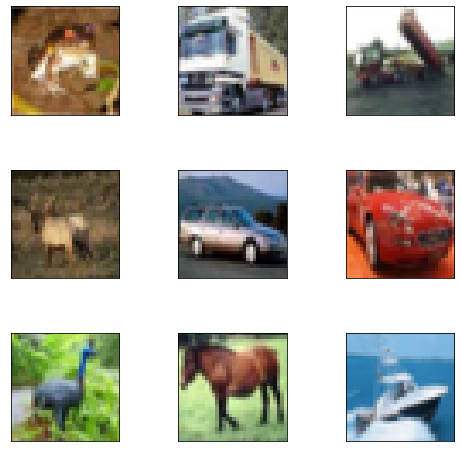

In [22]:
import matplotlib.pyplot as plt
    
fig, axes = plt.subplots(3, 3, figsize=(8,8))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i, ax in enumerate(axes.flat):
        
        ax.imshow(x_train[i])
        ax.set_xticks([])
        ax.set_yticks([])
       
plt.show()

**Some pre-processing**

In [23]:
# convert to float
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')

# divide by max value 255
x_train=x_train/225
x_test=x_test/255

In Cifar-10 dataset the label contains integer values ranging from 0 to 9 each representing a unique class:

0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
    
Use one-hot enconding format for the labels:

In [24]:
from keras.utils import np_utils
print("First label before one-hot encondig: ", y_train[0])

y_train=np_utils.to_categorical(y_train,10)
y_test=np_utils.to_categorical(y_test,10)

print("First label after one-hot encondig: ", y_train[0])

First label before one-hot encondig:  [6]
First label after one-hot encondig:  [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


**Define the CNN model**

These parts are not guided as the previous one, it's up to you to start from scratch and try out the implementation. However the procedure is pretty similar.

**Get summary of the model**


**Configure the model**


**Train the model**


**Evaluate the model**

## Final Comments

Until now we know different types of layers: Input, Dense, Conv2D, Dropout, Pooling, Activations. See information of those and more available layers [here](https://keras.io/api/layers/). Different configurations of those layers compose different structures seen during the lecture: GoogLeNet, AlexNet, VGGNet